In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd 
import plotly.figure_factory as ff
import numpy as np

In [ ]:
np.random.randn(10)

In [2]:
insert_size = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/atac/celescope_atac/20230911_pipeline/plot/insert_size.csv")

In [3]:
insert_size = insert_size[insert_size["isize"]<800]

In [6]:
insert_size

,Unnamed: 0,V1,V2,V3,V4,V5,isize
0,1,chr1_KI270706v1_random,19254,19323,CAGGGCTTGCGACTAT,1,69
1,2,chr1_KI270706v1_random,135038,135092,TCGCCTATGTGAGGCA,1,54
2,3,chr1_KI270708v1_random,75136,75179,ACTGGGCACCAACGCC,1,43
3,4,chr1_KI270713v1_random,22002,22039,ACCTGCTTGATAACCC,1,37
4,5,chr1_KI270760v1_alt,57750,57947,TATCTCCCTTCGTACA,1,197
...,...,...,...,...,...,...,...
99995,99996,chr1,226063600,226063781,TTTCGGCTGAGTACGG,1,181
99996,99997,chr1,247008028,247008138,TTTCGTAACAGGGCTA,1,110
99997,99998,chr1,229241486,229241773,TTTCTGATGCCGGCTA,1,287
99998,99999,chr1,232735444,232735708,TTTGGGAACAATAGCA,1,264


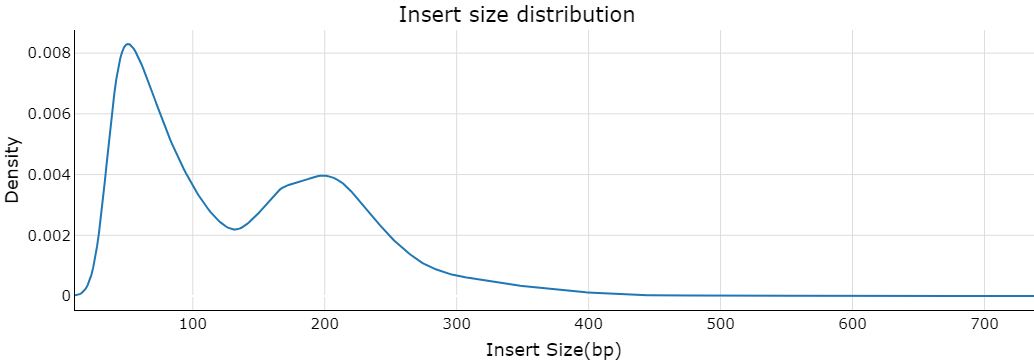

In [87]:
hist_data = [insert_size["isize"]]

group_labels = ['Sample']
colors = ['#1F77B4',]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors,show_rug=False) # colors=colors
fig.update_layout(title={"text": "Insert size distribution",
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  yaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  xaxis_title = "Insert Size(bp)", yaxis_title = "Density", font=dict(size=15,color="Black"),
                  showlegend=False,
                       margin=dict(l=50, r=0, t=30, b=30),
                       plot_bgcolor="#FFFFFF")
fig.show()

In [84]:
# # Aggregate TSS enrichment plot
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/atac/celescope_atac/20230911_pipeline/plot/tss_plot_data.csv")

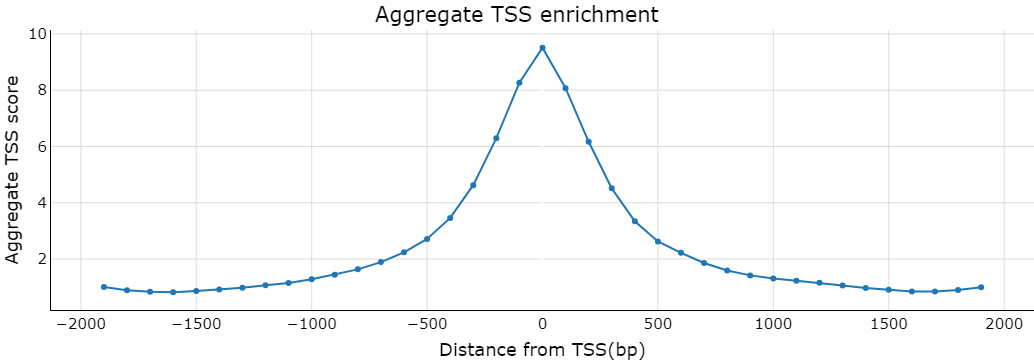

In [86]:
fig = px.line(df, x="dists", y="agg_tss_scores", markers=True, color_discrete_sequence=['#1F77B4']) #color_discrete_sequence=['4C78A8'])
fig.update_layout(title={"text": "Aggregate TSS enrichment",
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  yaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  xaxis_title = "Distance from TSS(bp)", yaxis_title = "Aggregate TSS score", font=dict(size=15,color="Black"),
                  showlegend=False,
                       margin=dict(l=50, r=0, t=30, b=30),
                       plot_bgcolor="#FFFFFF")
fig.show()

In [79]:
# # Fraction in peaks

In [113]:
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/atac/celescope_atac/20230911_pipeline/plot/cell_qc_metrics.csv")

In [114]:
df

,bc,total_frags,frac_peak,frac_promoter,frac_tss,frac_enhancer,frac_mito,cell_called
0,AAACGAAACAAATGCA,53,0.396226,0.339623,0.377358,0.169811,0.018868,False
1,AACACTGACTCCAATG,2322,0.438846,0.266581,0.324720,0.230835,0.021964,True
2,ACTTCATACAGTCGGA,6,0.166667,0.000000,0.333333,0.000000,0.166667,False
3,CACATGATGCCTAACA,6,0.000000,0.000000,0.000000,0.166667,0.000000,False
4,GCCATAATGCTGGAAG,12,0.333333,0.083333,0.500000,0.166667,0.166667,False
...,...,...,...,...,...,...,...,...
13269,TTCTAGACTCTGGCAC,7,0.000000,0.142857,0.285714,0.142857,0.000000,False
13270,TTCCCTGGACTTCAAG,6,0.333333,0.000000,0.166667,0.833333,0.000000,False
13271,TTCTAACACTGCCACG,7,0.571429,0.571429,0.714286,0.142857,0.000000,False
13272,GTCCTGACTCGGTTGC,7,0.142857,0.142857,0.142857,0.000000,0.000000,False


In [115]:
def label(df):
    if df["cell_called"] == True:
        return "Cells"
    else:
        return "Non-cells"
df['cell_called']=df.apply(label,axis=1)

In [116]:
df

,bc,total_frags,frac_peak,frac_promoter,frac_tss,frac_enhancer,frac_mito,cell_called
0,AAACGAAACAAATGCA,53,0.396226,0.339623,0.377358,0.169811,0.018868,Non-cells
1,AACACTGACTCCAATG,2322,0.438846,0.266581,0.324720,0.230835,0.021964,Cells
2,ACTTCATACAGTCGGA,6,0.166667,0.000000,0.333333,0.000000,0.166667,Non-cells
3,CACATGATGCCTAACA,6,0.000000,0.000000,0.000000,0.166667,0.000000,Non-cells
4,GCCATAATGCTGGAAG,12,0.333333,0.083333,0.500000,0.166667,0.166667,Non-cells
...,...,...,...,...,...,...,...,...
13269,TTCTAGACTCTGGCAC,7,0.000000,0.142857,0.285714,0.142857,0.000000,Non-cells
13270,TTCCCTGGACTTCAAG,6,0.333333,0.000000,0.166667,0.833333,0.000000,Non-cells
13271,TTCTAACACTGCCACG,7,0.571429,0.571429,0.714286,0.142857,0.000000,Non-cells
13272,GTCCTGACTCGGTTGC,7,0.142857,0.142857,0.142857,0.000000,0.000000,Non-cells


In [117]:
df = df.sort_values("cell_called", ascending=False)

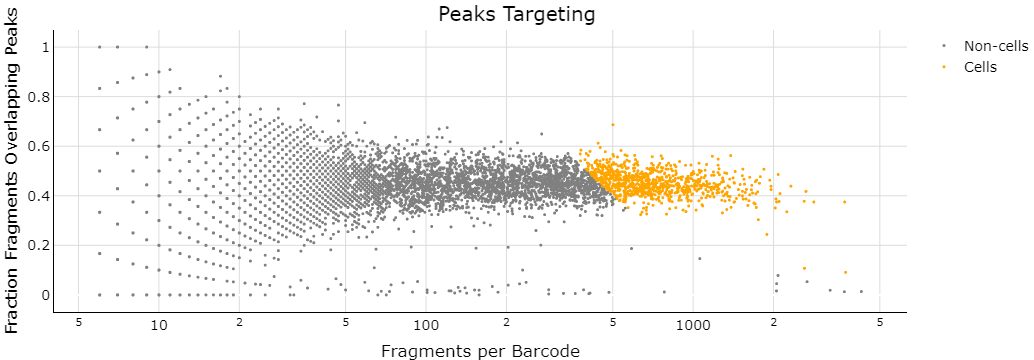

In [119]:
fig = px.scatter(df, x="total_frags", y="frac_peak", color="cell_called",color_discrete_sequence=["grey", "orange"]
                 )
fig.update_layout(title={"text": "Peaks Targeting",
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis={"type": "log", "color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  yaxis={"color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
                  xaxis_title = "Fragments per Barcode", yaxis_title = "Fraction Fragments Overlapping Peaks", font=dict(size=14,color="Black"),
                       margin=dict(l=50, r=0, t=30, b=30),
                       plot_bgcolor="#FFFFFF",
                       legend=dict(title_text=''))
fig.update_traces(marker_size=3)
fig.show()